In [10]:
%run common-imports.ipynb



This simple dataset will be the context on how to go about exploring the data, and building a simple predictive model around it.

## Lab Goals

* explore this data, observe its statistical characteristics, visualize it.
* Next, take a systematic approach to build a linear regression model to make prediction on the data. 

## Outcome

At the end of the lab, one should have an understanding of the following:

1. What is a dataframe
2. How to loading data into a dataframe, and describe it
3. How to use the pandas profiling to get some basic understanding of the data
4. Data visualization using Matplotlib
5. Building a simple linear regression model
6. Residual analysis of the model predictions
7. Model diagnostics
8. Model's prediction visualization

## Load and explore the data

A dataframe is **the fundamental representation of data**, and provides means to fluently manipulate and transform the data, as well as perform exploratory data analysis with it. Conveniently, most of the machine learning libraries take a dataframe as argument.

In [11]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/univariate-1.csv")

Now, let's get some rows of the data to get a feel for it. We have a few choices here:

* `head()` will give us the first few rows of data, `head(n)` will give us specifically the first `n` rows of data
* `tail()` will give us the last few rows of data, `tail(n)` will give us specifically the last `n` rows of data

In [12]:
data.head()

,x,y
0,0.00000,3.316495
1,0.01001,3.603107
2,0.02002,5.474551
3,0.03003,-5.566752
4,0.04004,-7.665651


In [13]:
data.tail()

,x,y
995,9.95996,77.796381
996,9.96997,77.367258
997,9.97998,79.251845
998,9.98999,83.738596
999,10.00000,84.129121


In [14]:
data.sample(5)

,x,y
521,5.215215,37.383970
737,7.377377,61.234191
740,7.407407,59.473919
660,6.606607,55.291097
411,4.114114,35.507410


#### Descriptive statistics
Pandas dataframe gives a convenient method to quickly observe the key descriptive statistics.

In [15]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,1000.0,5.000000,2.891085,0.000000,2.500000,5.000000,7.500000,10.000000
y,1000.0,41.366271,24.704582,-11.416569,20.524133,41.872787,62.042398,92.182776


#### Missing Values Analysis

Often times, dataset will have missing values -- certain instances of data will have one of more features missing their values. This can happen for a variety of reasons. For example, a value there may not make sense. For example, if you have a dataset on mammalian animals, one of the feature may be the length of the legs. A dolphin is a mammal, but it does not have legs (in the traditional sense). Therefore, a datum representing the attributes of a particular dophin will have a missing values for the attributes specifying the length of its legs. Another common reason could be that that specific feature, while it could have been observed, happened to not have been. An example can be the number of fireplaces in a house, when looking at a housing dataset.

check if there are any missing values in the data:

In [16]:
data.isnull().sum()

x    0
y    0
dtype: int64

There is also an excellent library `missingno` that presents the information visually:

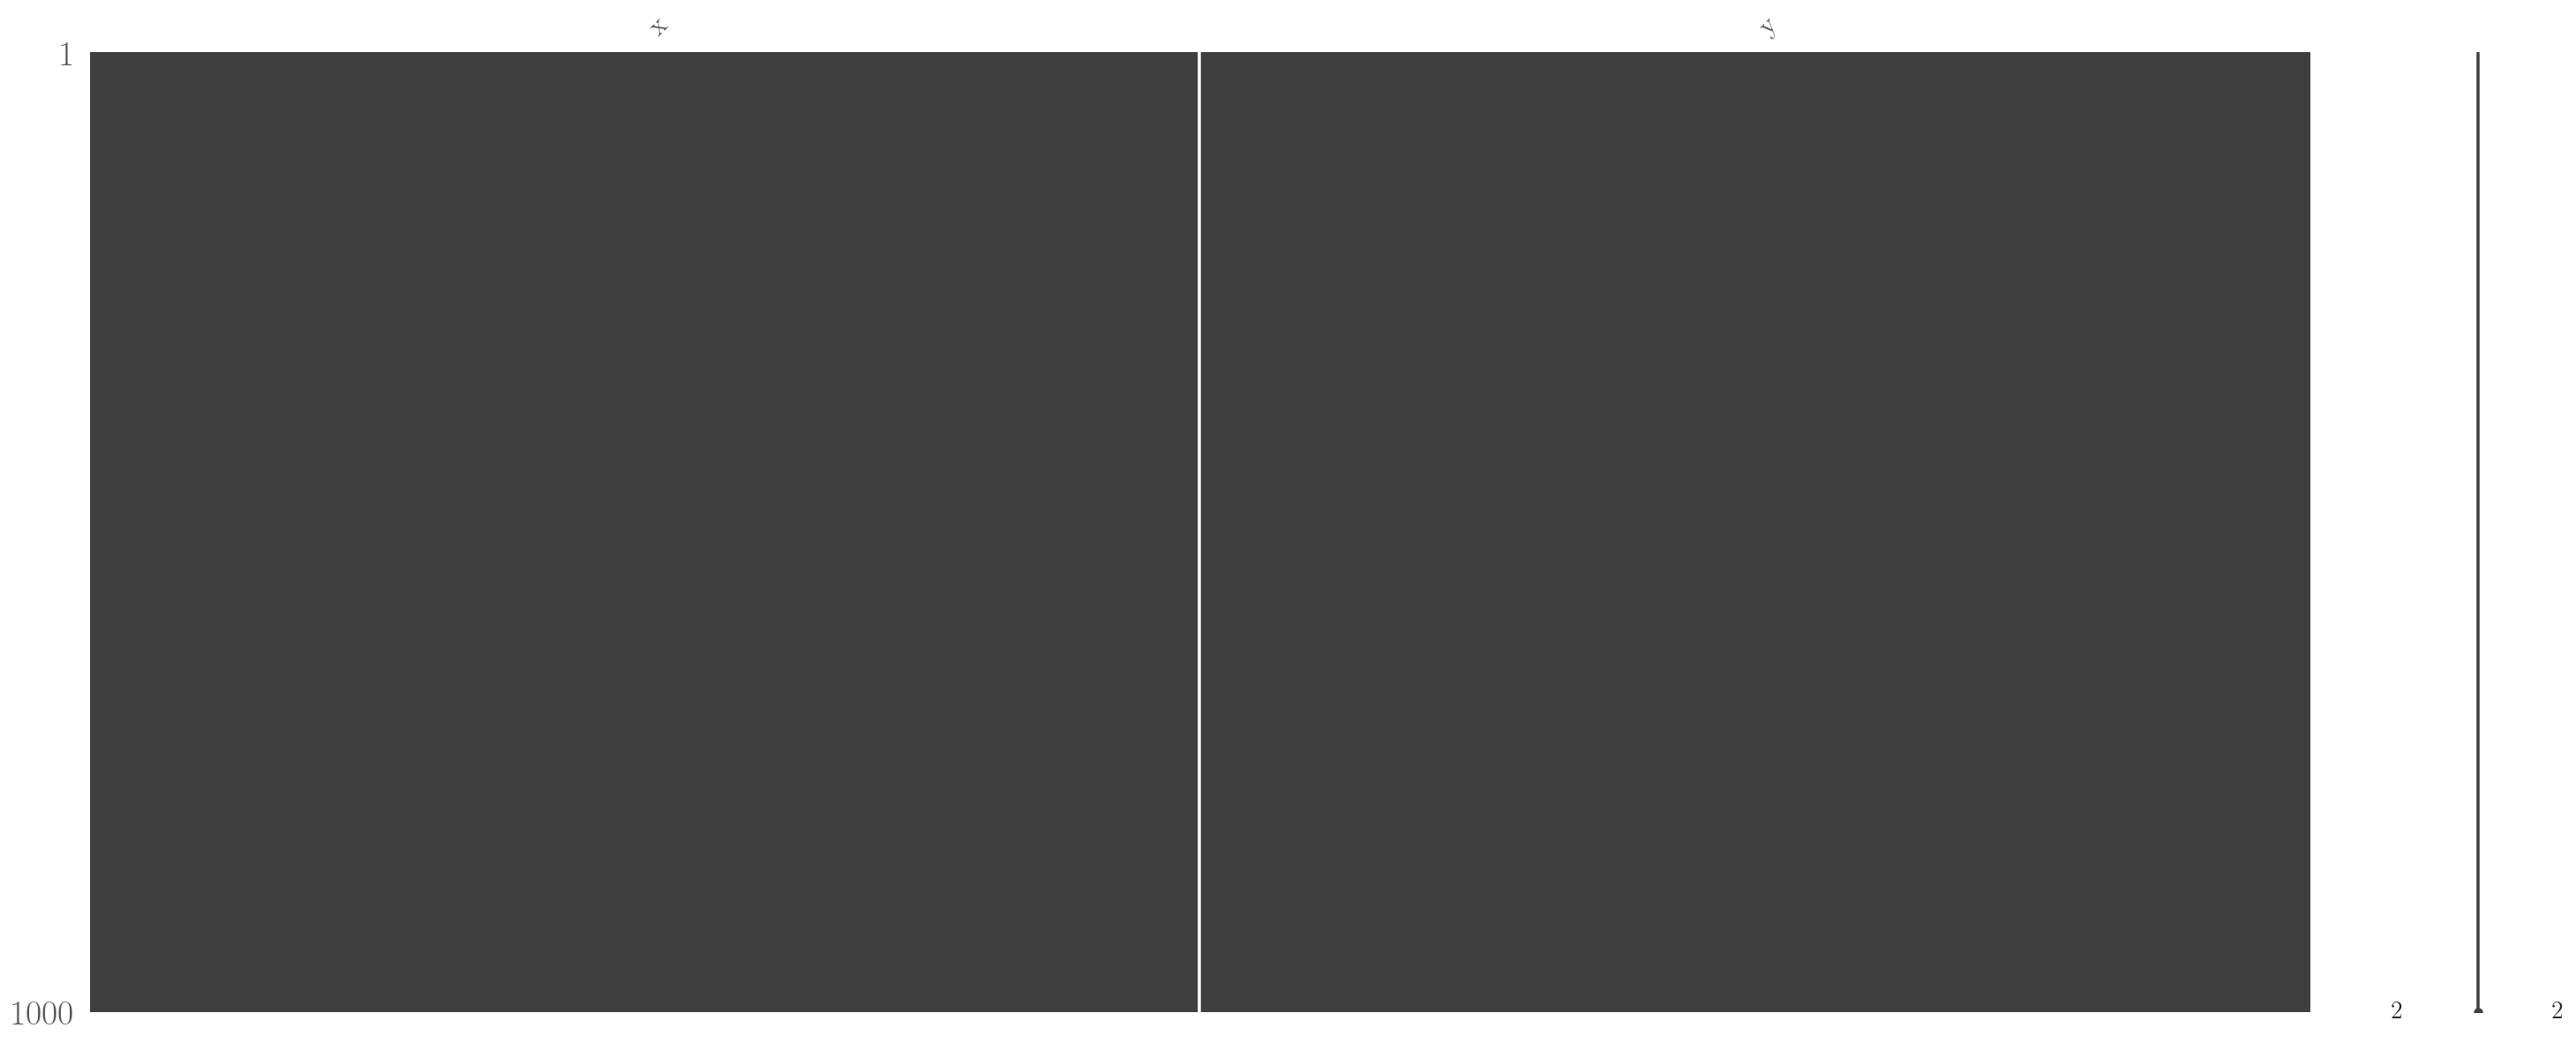

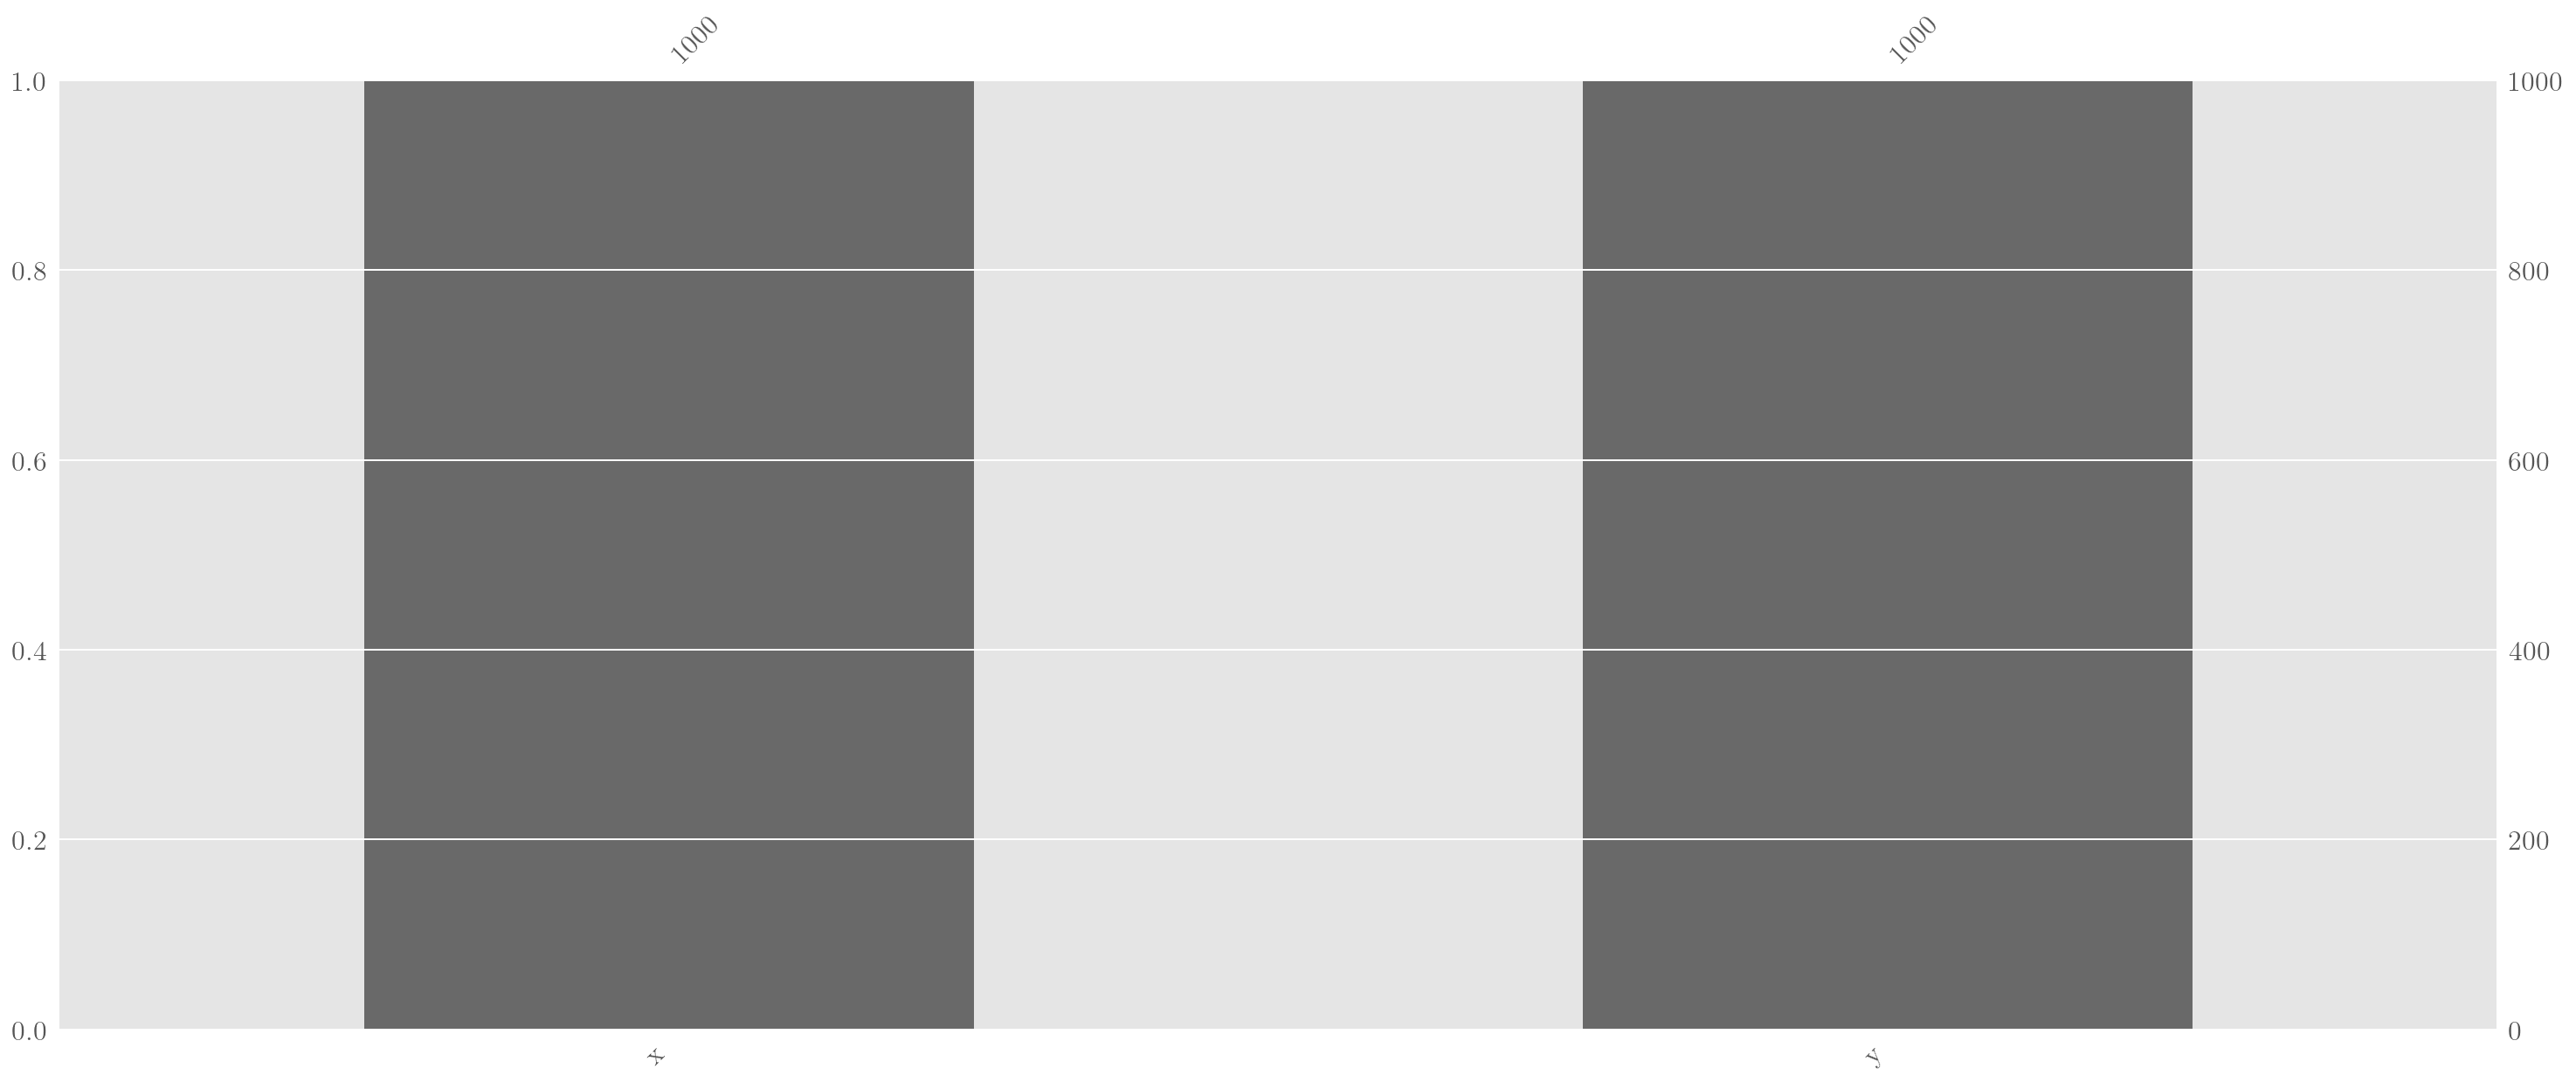

In [17]:
import missingno as msno
msno.matrix(data);
plt.show()
msno.bar(data);
plt.show()

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling

This is a useful tool to get a quick sense of the dataset. If you have not installed it yet, comment the below cell, and run it:

In [18]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

Let us now visualize this data to get a better sense of what it looks like. There is a rich variety of good data visualization libraries available in Python. Here we will use the mostly commonly used library, that is often considered the default one. This is the `matplotlib` library.

Consider investing some time in becoming fluent in `matplotlib` as soon as posssible -- it is one of the most common and necessary tools to master.

Below, we will start with a simple scatterplot of the bivariate data:

### Plotting using matplotlib

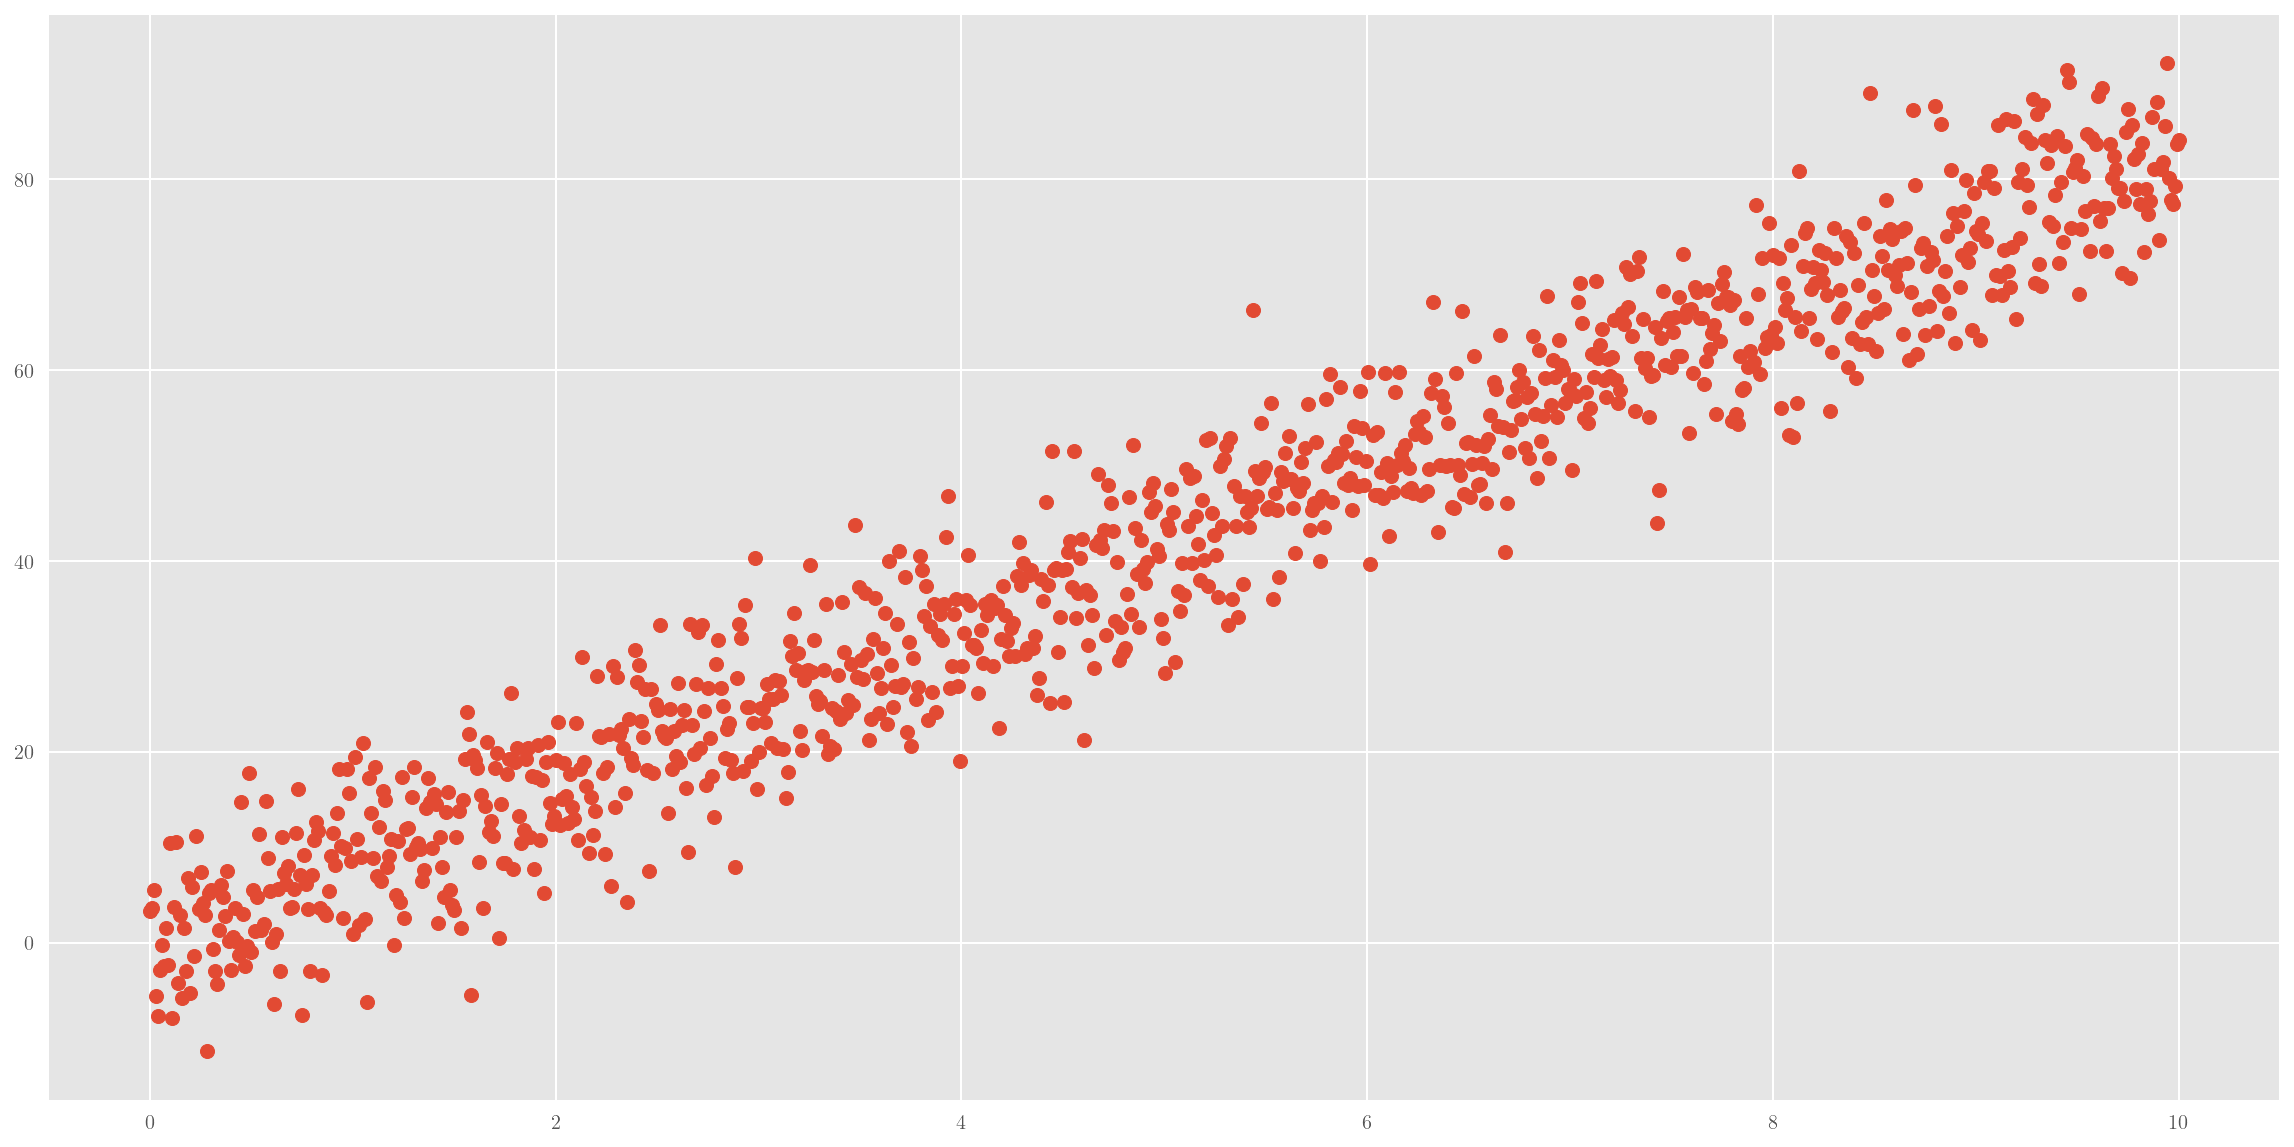

In [19]:
plt.scatter(data['x'], data['y']);

Observe that the data appears to be linear, and with a positive correlation.

The plot of the data, in its default form, leaves some scope for improvement:
* the title, x-label, and y-labels are missing
* it could be more aesthetically pleasing
* (optionally) if one would like production quality labels and titles, one can use the power of $\LaTeX$ typesetting too.

In the below code snippet, we have added some basic aethetics, as well as rendered the title and axes labels using $\LaTeX$. Those not familiar with $\LaTeX$ may want to go on an interesting journey of learning to create beautiful typesetting, especially of mathematical writing. However, it is not strictly essential to our current endeavor to learn data science.

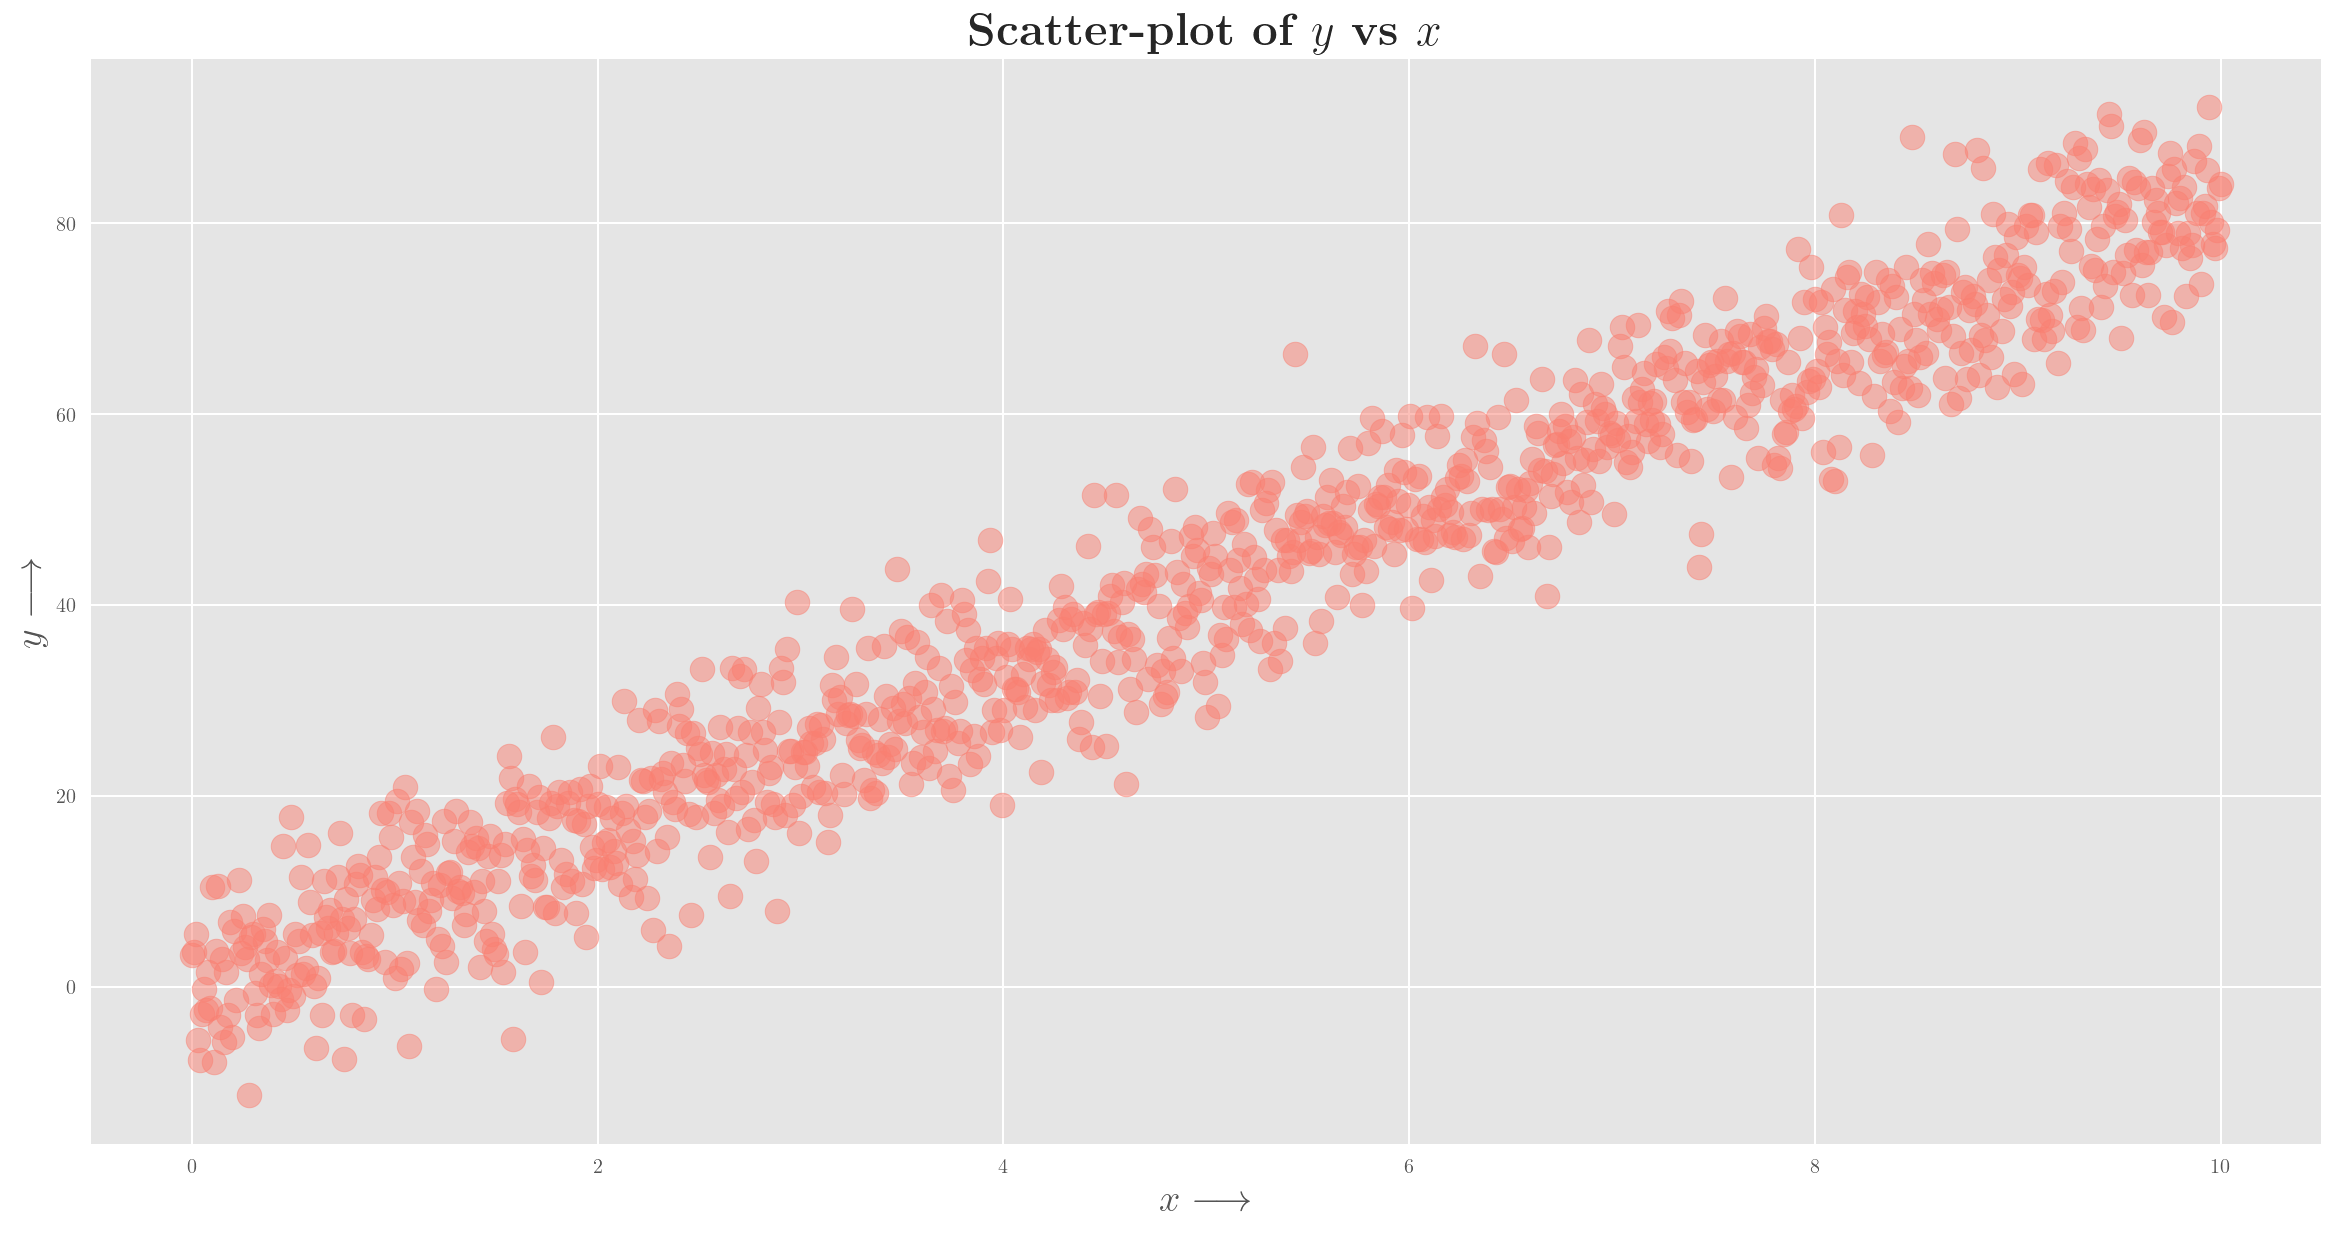

In [20]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

### Seaborn

`seaborn` is another good plotting library, that builds upon `matplotlib` and layers better aethetics by default.

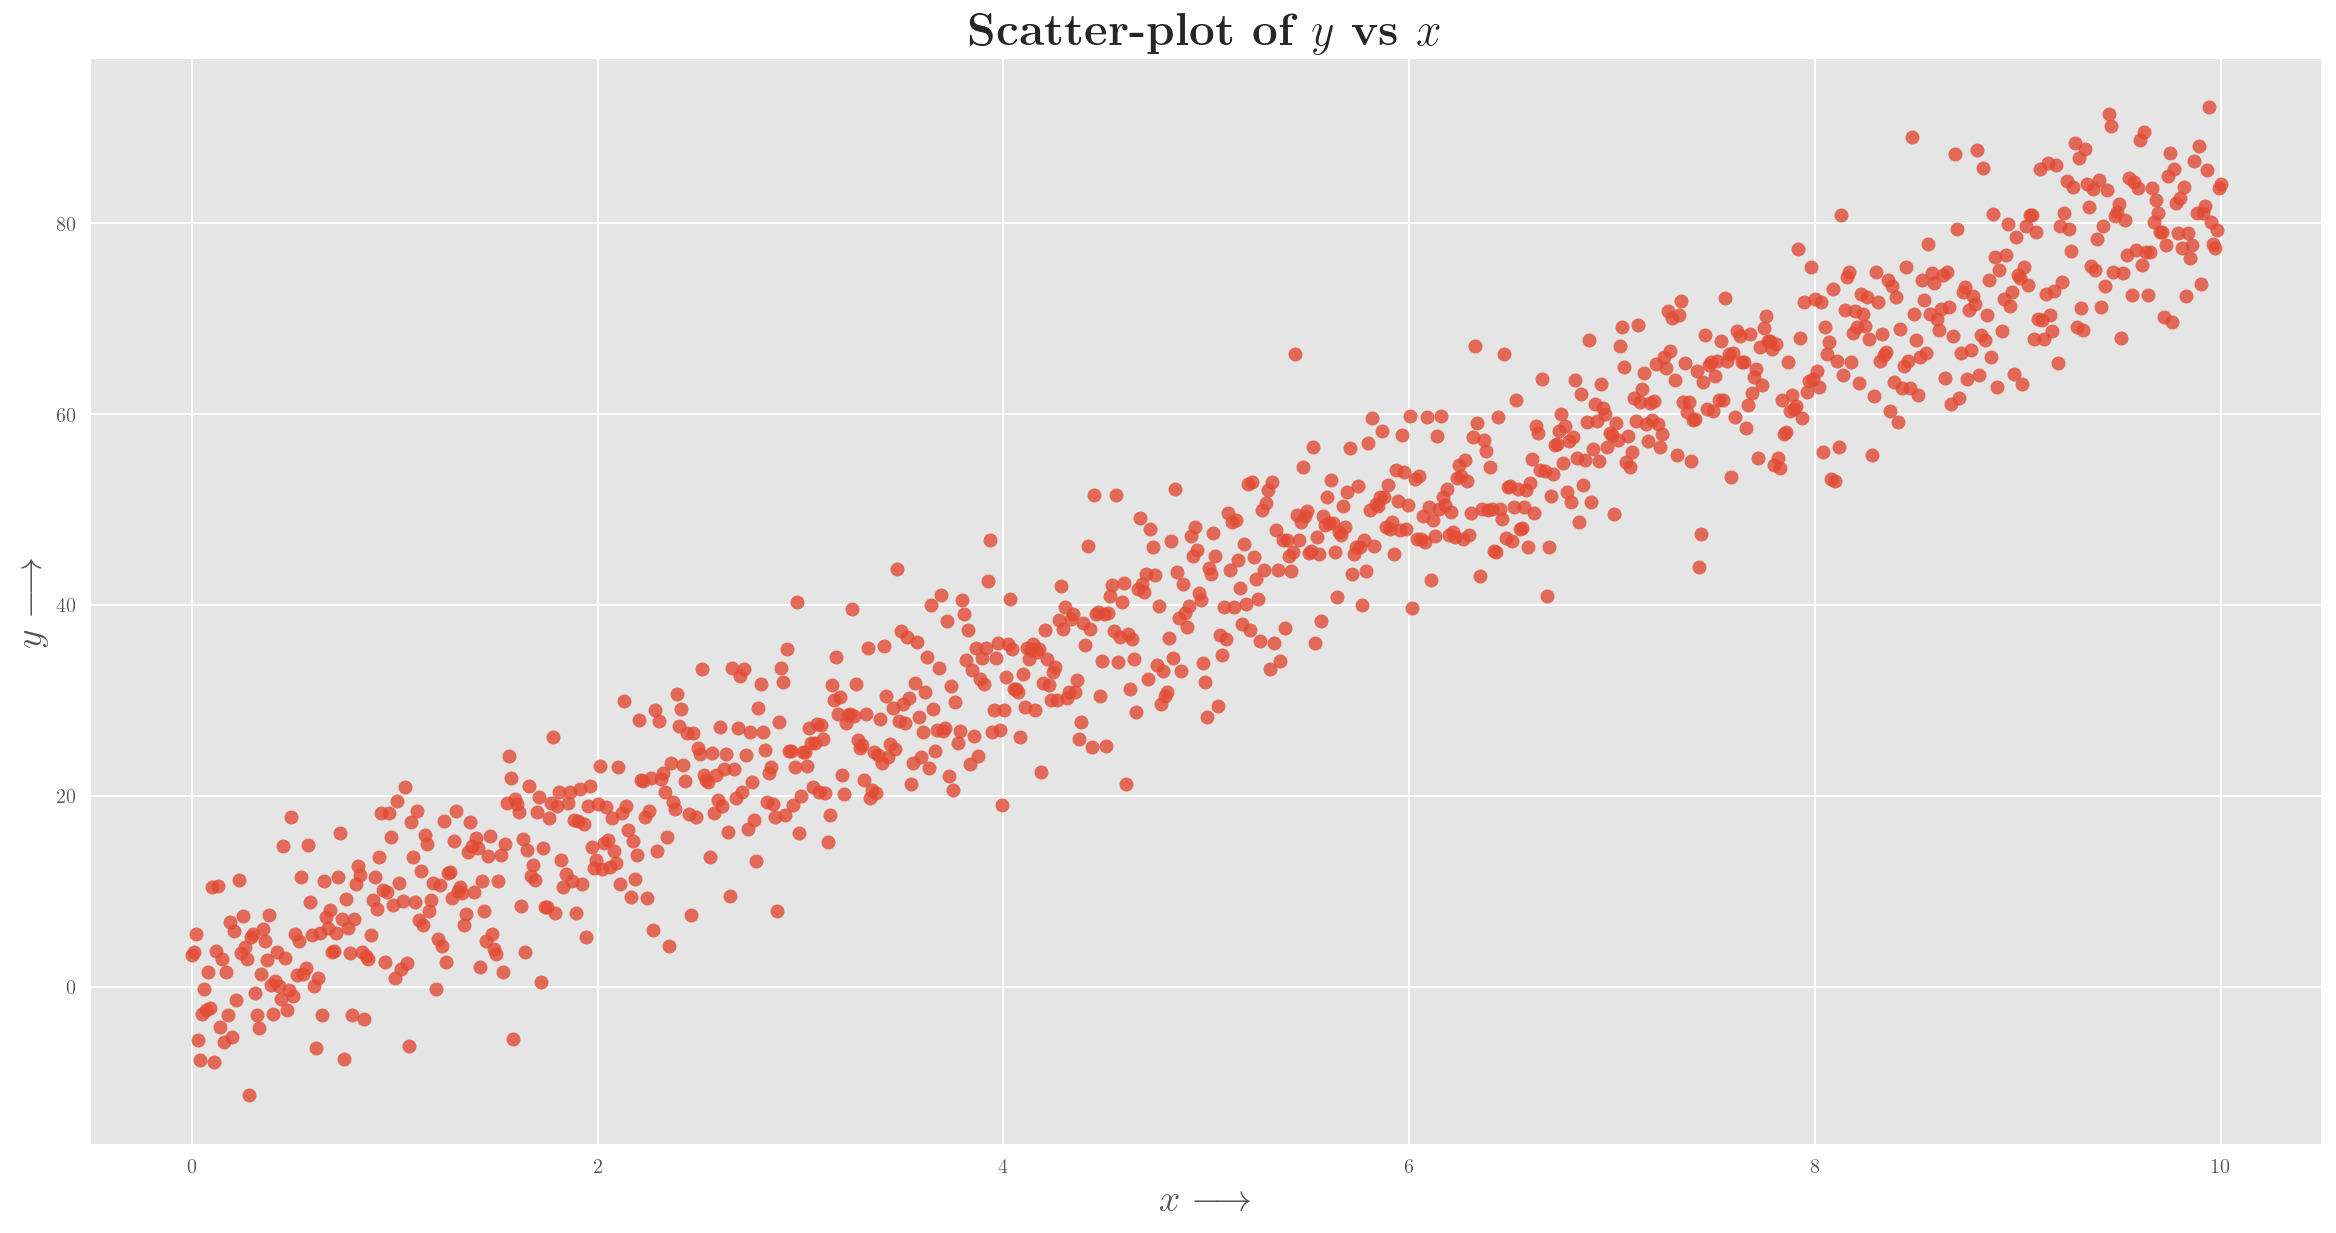

In [21]:
# Repeating the same thing with seaborn
sns.regplot(x="x", y="y", data=data, fit_reg=False, )
# or use sns.scatterplot(...)
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

### Altair
This is a yet another good visualization library, based on Vega-lite/D3. It tends to produce interactive graphs; observe how you can hover over the points and see their values as tooltip. Also, you can use your mouse wheel (or other favorite method of yours) to zoom in and out of the graph.

In [22]:
alt.Chart(data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['x', 'y']
).properties (width=800, height=400).interactive()

alt.Chart(...)

# Regression

Let us build a linear regression model for this dataset. In order to do so, will start out with Scikit-Learn library (`sklearn`). In our dataset, let us treat `x` as the independent variable, also called a predictor or regressor, or simply, input variable. And let `y` be the dependent variable, also called the target variable, the output, the response (and very rarely, the regressand).

first separate out the predictor from the target:

In [23]:
X, y = data[['x']], data['y']

Observe that call the predictor dataframe as `X` (note the capitalization), and the target as simply the array of values: `y`. While we could have named the variables anything, it is a well established practice in python based data science notebooks to follow this particular naming convention. It makes is much easier for other data scientists to read a notebook if it follows the well established naming conventions.

## Split the data into test and train subsets

In order to know how good at predicting are the regression models we will build, we need to take a subset of the data, and sort of "hide it under the pillow", and not allow the algorithm to see it during the training process. Then we can check if the model is making good predictions by comparing the said predictions against the actual target values.

Once again, observe how we follow the well established naming conventions for the training and test subsets of the data:


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,)

## Build the regression model

build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [25]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [26]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: -0.11925692927735554, Slope: [8.30315485]


Look back at the dat visualization, and see if this agrees with your own estimates.

## Predictions from the model

the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [27]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 32.46
Coefficient of Determination (R^2):0.9476487518825252


The coefficient of determination, $R^2$, seems to imply that we may have arrived at a potentially good model. Remember that the maximum value that $R^2$ can achieve is 1. However, a good $R^2$ is not necessarily an evidence of a good model. We will see this fact illustrated in our subsequent notebooks.

But for now, let's proceed with the next step of model verification: namely the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

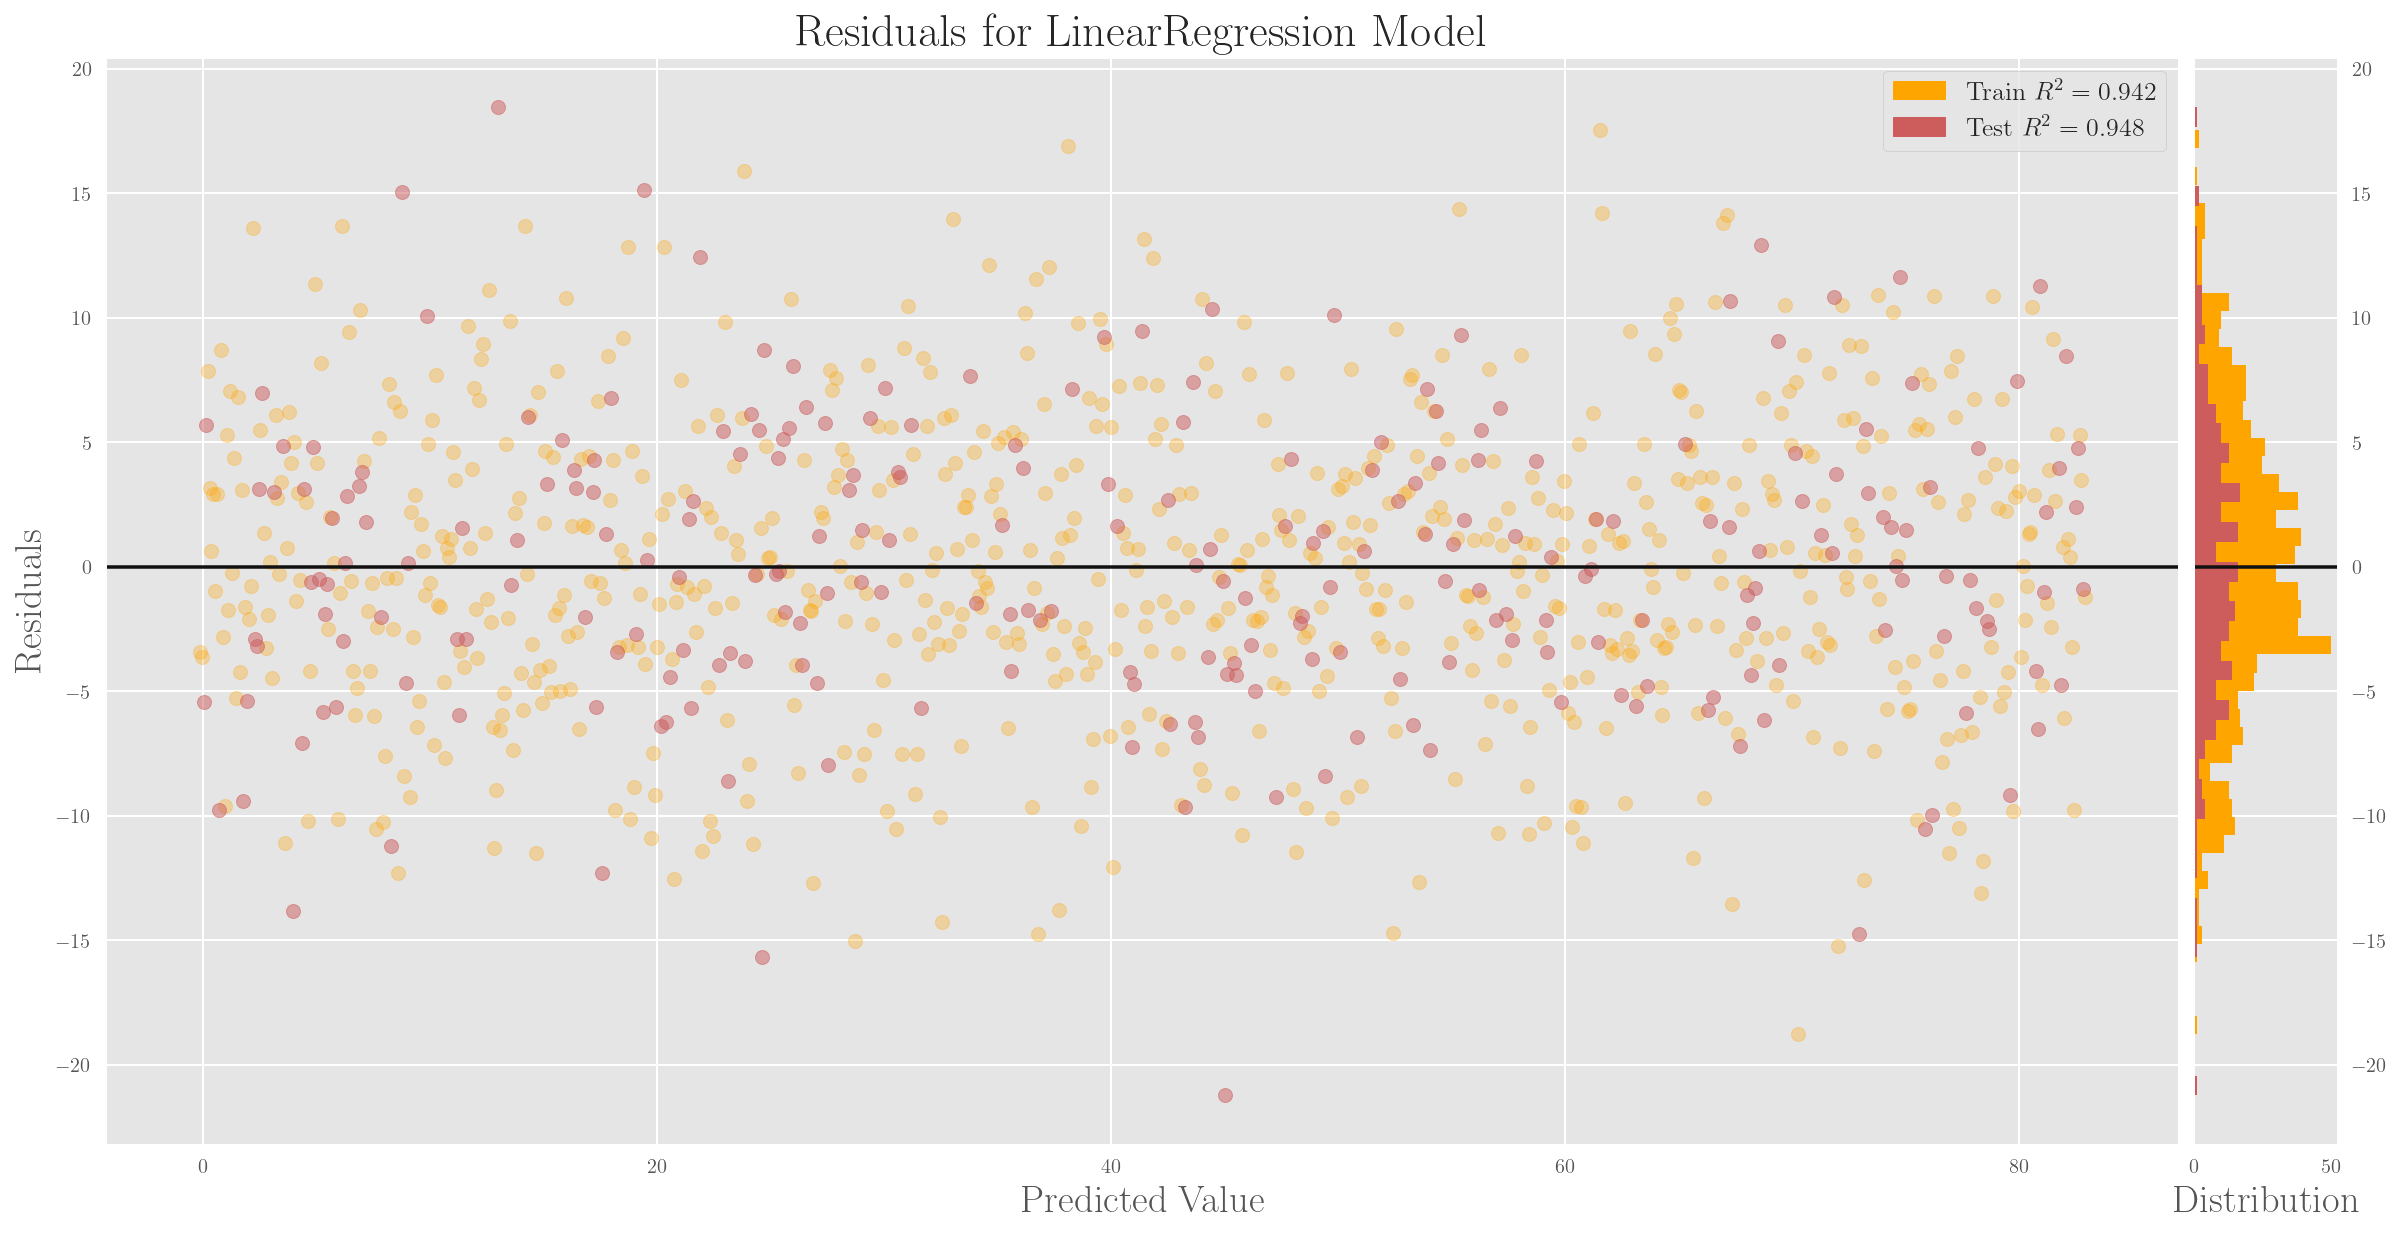

In [28]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

Looking at the data, we observe that the prediction residuals for both the training data as well as test data seem to have a **normal** aka gaussian distribution (see the distribution plot on the right).

Furthermore, there seems to be no discernible pattern in the residuals as we move from left to right in the residuals plot. In other words, what we are observing is the **homoscedasticity** in the residuals: for any predicted value, the variance of the residuals seems to be essentially the same. This is an encouraging sign that our model is good.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [29]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

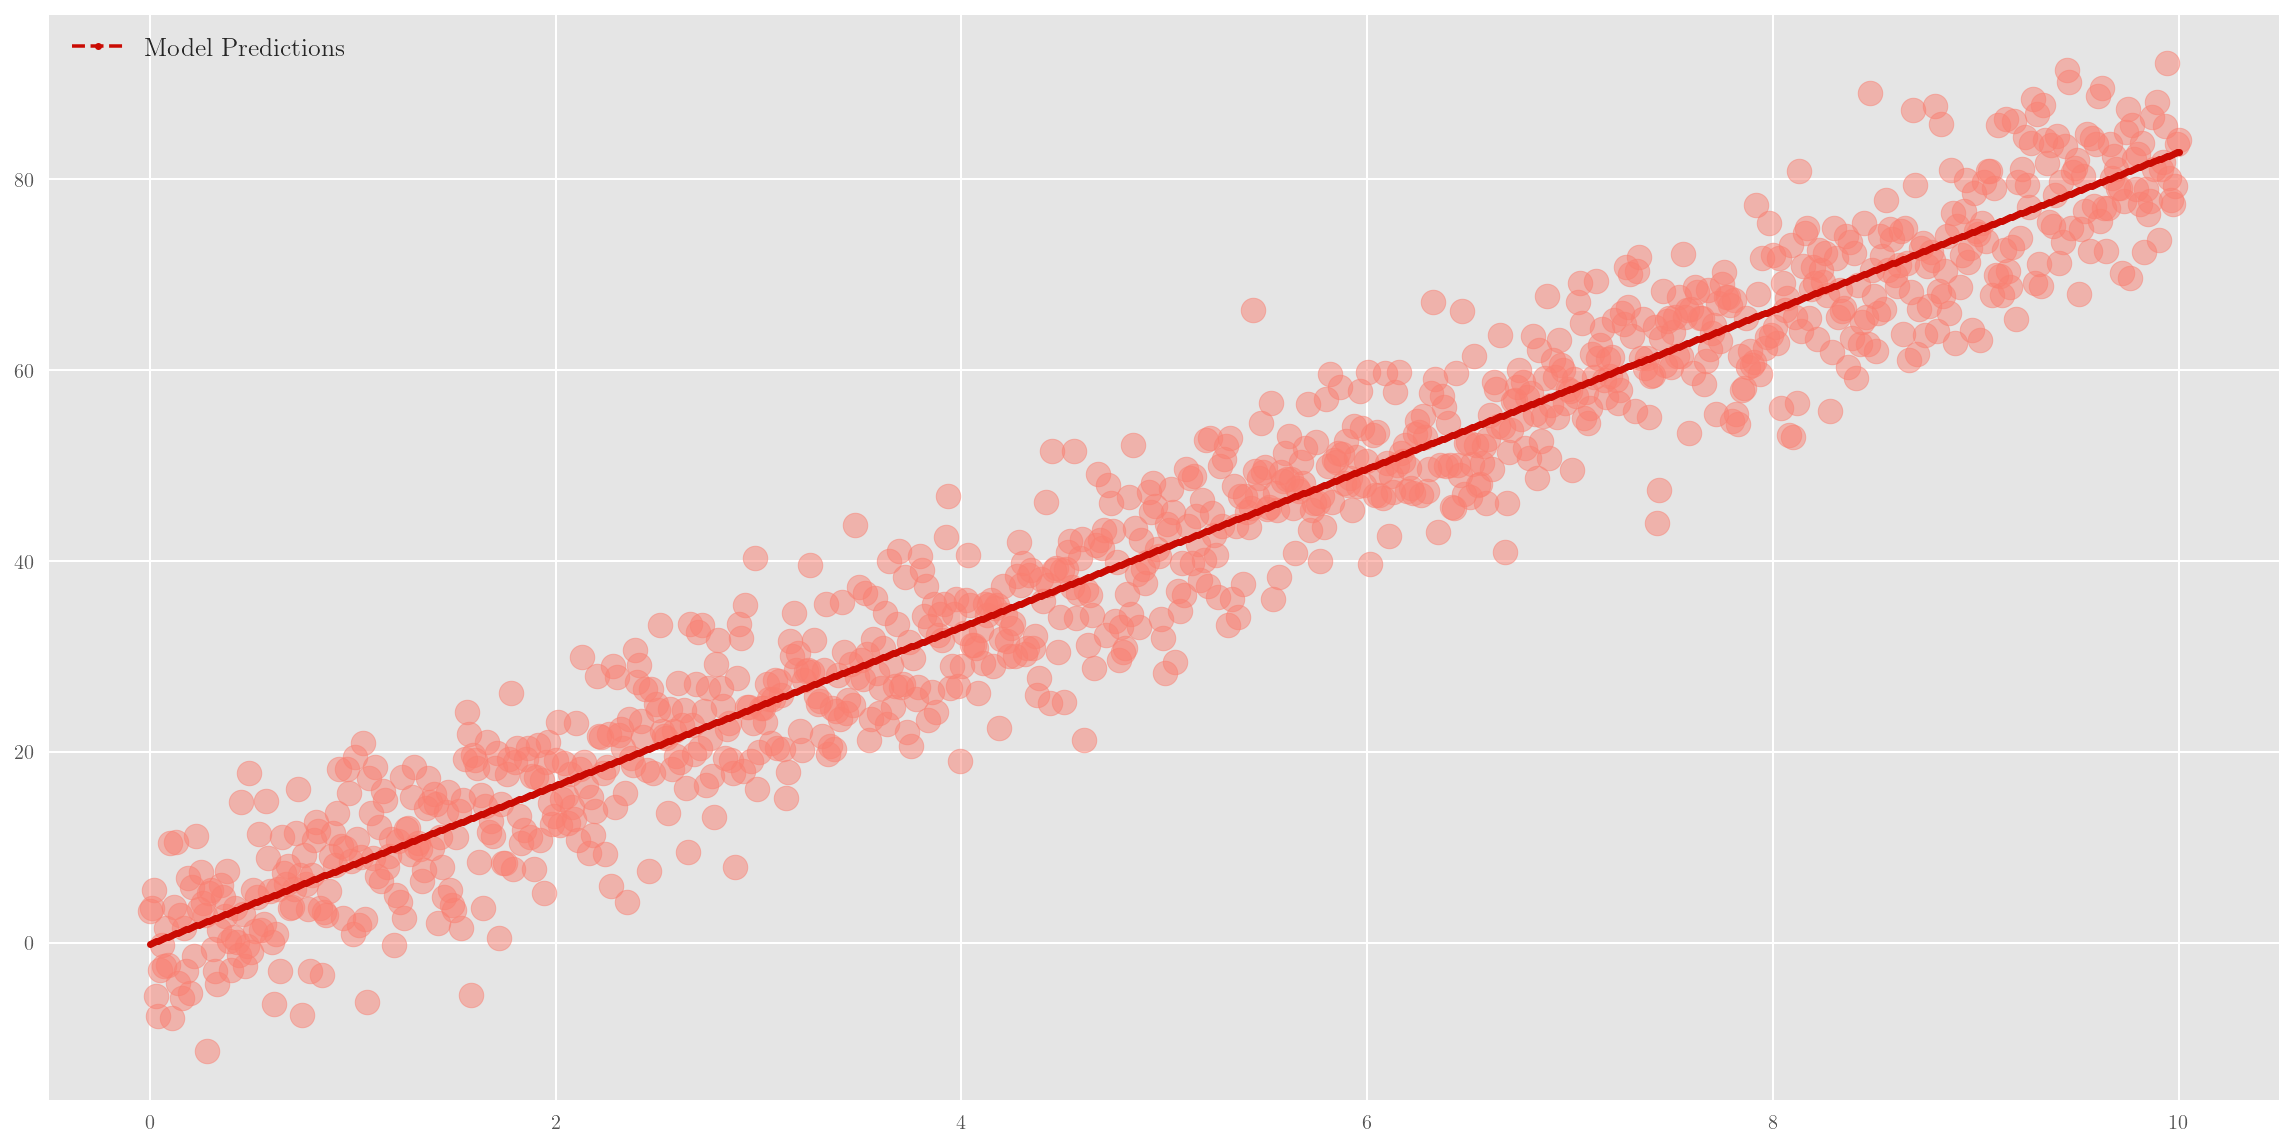

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

# Conclusion

Remember Box's famous truism: **"All models are wrong, but some are useful".**

For this dataset, there are multiple indicators that we have arrived at an effective model:
* the coefficient of determination ($R^2$) is good
* the residuals exhibit homoscedasticity, and the residuals plot shows no patterns indicating the variance of the residuals changes significantly for different values of the predictions
* finally, the prediction plot when superimposed over the dataset indicates a high degree of agreement.
